In [1]:
%pip install pmdarima

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/SLIIT/Y4S1/IOTBDA

/content/drive/MyDrive/SLIIT/Y4S1/IOTBDA


In [5]:
temp = pd.read_csv("/content/drive/MyDrive/SLIIT/Y4S1/IOTBDA/temp.csv", date_parser=[0])

In [6]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
0,1796-01-01,24.317,2.190,Colombo,Sri Lanka
1,1796-02-01,23.923,1.484,Colombo,Sri Lanka
2,1796-03-01,24.407,2.309,Colombo,Sri Lanka
3,1796-04-01,27.171,1.650,Colombo,Sri Lanka
4,1796-05-01,29.050,1.290,Colombo,Sri Lanka


In [7]:
temp.shape

(2613, 5)

In [8]:
temp.dt = pd.to_datetime(temp.dt)
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2613 non-null   datetime64[ns]
 1   AverageTemperature             2508 non-null   float64       
 2   AverageTemperatureUncertainty  2508 non-null   float64       
 3   City                           2613 non-null   object        
 4   Country                        2613 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 102.2+ KB
None


In [9]:
temp.isnull().sum()

dt                                 0
AverageTemperature               105
AverageTemperatureUncertainty    105
City                               0
Country                            0
dtype: int64

In [10]:
temp[temp.AverageTemperature.isna()]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
12,1797-01-01,NaN,NaN,Colombo,Sri Lanka
13,1797-02-01,NaN,NaN,Colombo,Sri Lanka
27,1798-04-01,NaN,NaN,Colombo,Sri Lanka
28,1798-05-01,NaN,NaN,Colombo,Sri Lanka
63,1801-04-01,NaN,NaN,Colombo,Sri Lanka
...,...,...,...,...,...
824,1864-09-01,NaN,NaN,Colombo,Sri Lanka
825,1864-10-01,NaN,NaN,Colombo,Sri Lanka
826,1864-11-01,NaN,NaN,Colombo,Sri Lanka
827,1864-12-01,NaN,NaN,Colombo,Sri Lanka


In [11]:
monthly_temp_avg_list = list()

for i in range(12):
  m_avg = temp[pd.DatetimeIndex(temp.dt).month == (i+1)].mean(numeric_only=True)
  m_avg_tuple = (m_avg[0], m_avg[1])
  monthly_temp_avg_list.append(m_avg_tuple)

monthly_temp_avg_list

[(24.19209523809525, 1.1201),
 (24.039885714285724, 1.04145238095238),
 (25.673476190476183, 1.0312190476190481),
 (27.413801932367146, 0.9722125603864734),
 (28.902565217391288, 0.8509420289855072),
 (28.271755980861236, 0.8784976076555028),
 (27.078728571428556, 0.8288857142857143),
 (26.61944761904763, 0.7725952380952382),
 (26.861770334928227, 0.7577942583732057),
 (27.69363157894736, 0.8915502392344496),
 (27.306114832535897, 1.0404258373205744),
 (25.574889423076918, 1.0955769230769226)]

In [12]:
for i in range(12):
  temp.loc[(temp.AverageTemperature.isna()) & (pd.DatetimeIndex(temp.dt).month==(i+1)), "AverageTemperature"] = monthly_temp_avg_list[(i)][0]
  temp.loc[(temp.AverageTemperatureUncertainty.isna()) & (pd.DatetimeIndex(temp.dt).month==(i+1)), "AverageTemperatureUncertainty"] = monthly_temp_avg_list[(i)][1]
temp.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
dtype: int64

In [13]:
# All null values were filled using the average monthly value for all years in the total dataset
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
0,1796-01-01,24.31700,2.190000,Colombo,Sri Lanka
1,1796-02-01,23.92300,1.484000,Colombo,Sri Lanka
2,1796-03-01,24.40700,2.309000,Colombo,Sri Lanka
3,1796-04-01,27.17100,1.650000,Colombo,Sri Lanka
4,1796-05-01,29.05000,1.290000,Colombo,Sri Lanka
...,...,...,...,...,...
2608,2013-05-01,29.71800,0.574000,Colombo,Sri Lanka
2609,2013-06-01,27.68600,0.260000,Colombo,Sri Lanka
2610,2013-07-01,26.51900,0.177000,Colombo,Sri Lanka
2611,2013-08-01,26.95300,0.390000,Colombo,Sri Lanka


In [14]:
temp_df = temp.copy()
temp_df.set_index(temp_df.dt, inplace=True)
temp_df = temp_df.drop(columns=['dt'])
temp_df

,AverageTemperature,AverageTemperatureUncertainty,City,Country
dt,,,,
1796-01-01,24.31700,2.190000,Colombo,Sri Lanka
1796-02-01,23.92300,1.484000,Colombo,Sri Lanka
1796-03-01,24.40700,2.309000,Colombo,Sri Lanka
1796-04-01,27.17100,1.650000,Colombo,Sri Lanka
1796-05-01,29.05000,1.290000,Colombo,Sri Lanka
...,...,...,...,...
2013-05-01,29.71800,0.574000,Colombo,Sri Lanka
2013-06-01,27.68600,0.260000,Colombo,Sri Lanka
2013-07-01,26.51900,0.177000,Colombo,Sri Lanka


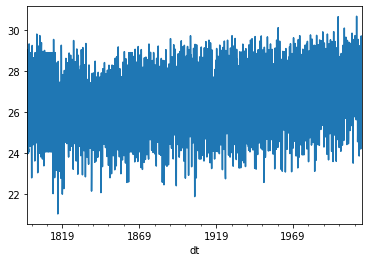

In [15]:
# check if data is stationary by plotting
temp_df.AverageTemperature.plot()
plt.show()

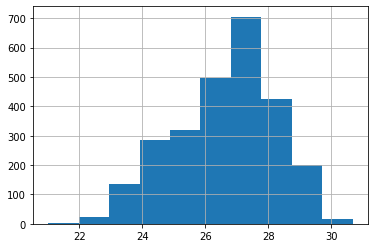

In [16]:
# check if data has a bell curve (normal dist)
temp_df.AverageTemperature.hist()
plt.show()

In [17]:
# See if two parts of the same dataset has the same mean and varience. if different => non stationary, if almost similar => data is stationary
vals = temp_df.AverageTemperature.values
split = int(len(vals) / 2)
print('split = ', split)

vals1, vals2 = vals[0:split], vals[split:]
mean1, mean2 = vals1.mean(), vals2.mean()
var1, var2 = vals1.var(), vals2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

split =  1306
mean1=26.374018, mean2=26.896632
variance1=2.493149, variance2=2.506570


In [18]:
# ADF test suggests that data is stationary. (P value <= 0.05)
from statsmodels.tsa.stattools import adfuller
vals = temp_df.AverageTemperature.values
result = adfuller(vals)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.155408
p-value: 0.000783
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [19]:
# ADF test suggests that data is non-stationary. (NOTE: this step is the same as above)
from statsmodels.tsa.stattools import adfuller, acf, pacf
vals = temp_df.AverageTemperature.values
dftest = adfuller(vals, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Stats", "p-value", "# Lags", "# of obs"])
for key, value in dftest[4].items():
    dfoutput[f"Critical Value ({key})"] = value
print(dfoutput)

Test Stats                -4.155408
p-value                    0.000783
# Lags                    28.000000
# of obs                2584.000000
Critical Value (1%)       -3.432883
Critical Value (5%)       -2.862659
Critical Value (10%)      -2.567366
dtype: float64


In [20]:
from pmdarima.arima import ADFTest

adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(temp_df.AverageTemperature)

(0.01, False)

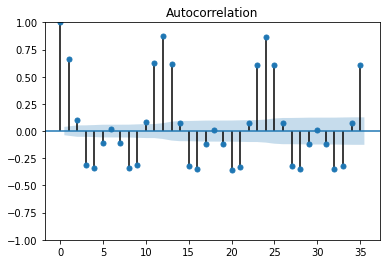

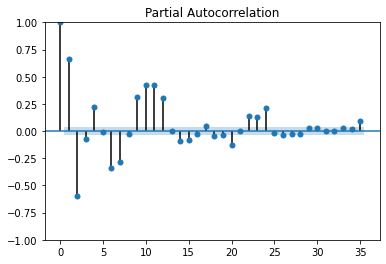

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(temp_df.AverageTemperature);
plot_pacf(temp_df.AverageTemperature, method='ywm');

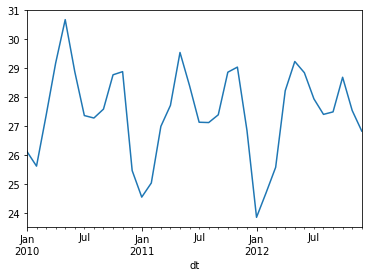

In [22]:
# Identifying freq, m by looking at few years of temp. data, m=12
temp_df.AverageTemperature[-45:-9].plot()
plt.show()

# Applying ARIMA [Original Dataset]

In [23]:
# new test/train split 80/20
test_split_size = int(temp_df.shape[0]*0.2)
train_split_size = temp_df.shape[0] - test_split_size
print(test_split_size, train_split_size, train_split_size+test_split_size, temp_df.shape[0])

train_split = temp_df[:train_split_size]
test_split = temp_df[train_split_size:]
print(train_split.AverageTemperature.head(), test_split.AverageTemperature.head())

522 2091 2613 2613
dt
1796-01-01    24.317
1796-02-01    23.923
1796-03-01    24.407
1796-04-01    27.171
1796-05-01    29.050
Name: AverageTemperature, dtype: float64 dt
1970-04-01    27.835
1970-05-01    29.348
1970-06-01    27.870
1970-07-01    27.384
1970-08-01    26.703
Name: AverageTemperature, dtype: float64


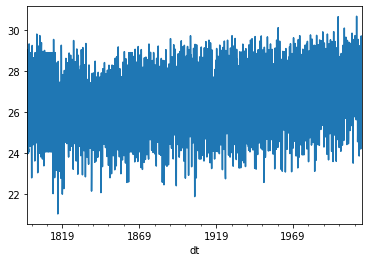

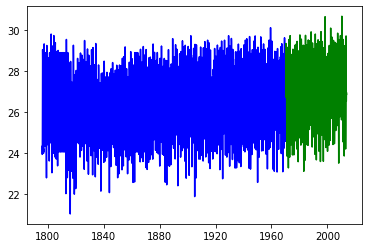

In [24]:
temp_df.AverageTemperature.plot()
plt.show()

plt.plot(train_split.AverageTemperature, c='blue')
plt.plot(test_split.AverageTemperature, c='green')
plt.show()

In [194]:
from statsmodels.tsa.arima.model import ARIMA

statsmodels_arima_model = ARIMA(train_split.AverageTemperature, order=(4,1,3))
statsmodels_arima_results = statsmodels_arima_model.fit()
print(statsmodels_arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 2091
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2677.924
Date:                Thu, 17 Mar 2022   AIC                           5371.848
Time:                        19:16:57   BIC                           5417.008
Sample:                    01-01-1796   HQIC                          5388.393
                         - 03-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1265      0.060      2.100      0.036       0.008       0.245
ar.L2         -0.0237      0.057     -0.418      0.676      -0.135       0.088
ar.L3         -0.9750      0.057    -17.158      0.0

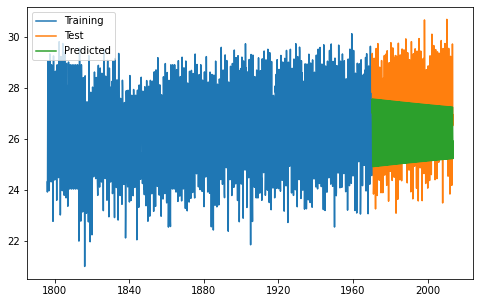

In [195]:
statsmodels_arima_predictions = statsmodels_arima_results.predict(start=test_split.index[0], end=test_split.index[-1])
statsmodels_arima_predictions.columns = ['predicted_temp']
plt.figure(figsize=(8,5))
plt.plot(train_split.AverageTemperature,label="Training")
plt.plot(test_split.AverageTemperature,label="Test")
plt.plot(statsmodels_arima_predictions,label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('SecondPrection.jpg')
plt.show()

Doesn't seem like a strong model. predictions are kind of moving around the average bug gradually decreases.

In [25]:
import pmdarima as pm

model = pm.auto_arima(train_split.AverageTemperature, 
                      start_p=0, 
                      start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, 
                      max_q=4, # maximum p and q
                      m=1,             # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19648.567, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16854.557, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6759.267, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6755.301, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5720.322, Time=1.86 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=6024.313, Time=1.33 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=2.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.46 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.84 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5715.665, Time=4.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5722.452, Time=2.91 sec


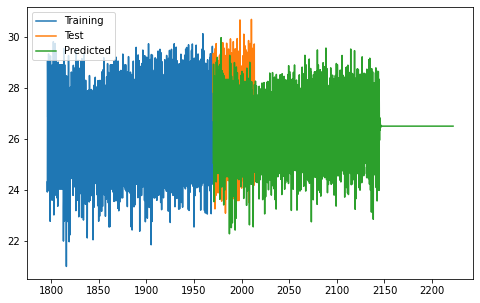

In [26]:
dates= pd.date_range(test_split.index[0],'2222-02-01' , freq='1M')-pd.offsets.MonthBegin(1)

model_predictions = model.predict_in_sample(start=1, end=test_split_size+100+(12*200))
model_predictions = pd.Series(model_predictions, index=dates)
model_predictions
model_predictions.columns = ['predicted_temp']
plt.figure(figsize=(8,5))
plt.plot(train_split.AverageTemperature,label="Training")
plt.plot(test_split.AverageTemperature,label="Test")
plt.plot(model_predictions,label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('SecondPrection.jpg')
plt.show()

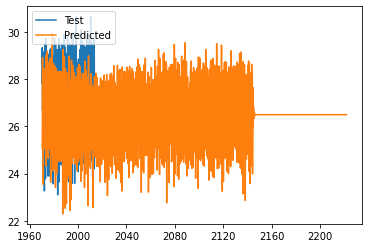

In [27]:
plt.plot(test_split.AverageTemperature,label="Test")
plt.plot(model_predictions,label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('SecondPrection.jpg')
plt.show()

In [28]:
# # Generate index dates
# dates= pd.date_range(test_split.index[-1],'2022-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
# len(dates)

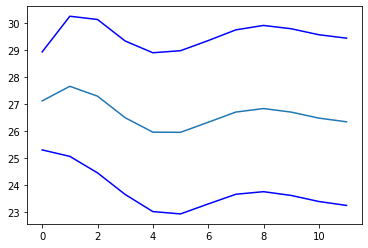

In [29]:
# High/Low marginals
model_predictions = model.predict(n_periods=12, alpha=0.05, return_conf_int=True)
pred_act = pd.Series(model_predictions[0])
pred_df = pd.DataFrame(model_predictions[1].copy())
plt.plot(pred_act)
plt.plot(pred_df.loc[:][0], c="blue")
plt.plot(pred_df.loc[:][1], c="blue")
plt.show()

In [30]:
from pandas import datetime as dt
now_d = dt.now().strftime("%Y-%m-%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


623
623


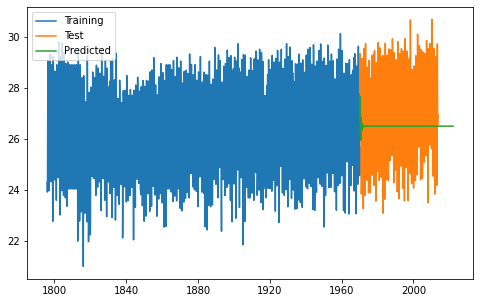

In [31]:
dates= pd.date_range(test_split.index[0], now_d , freq='1M')-pd.offsets.MonthBegin(1)
print(len(dates))

model_predictions_out = model.predict(n_periods=len(dates), X=temp_df.AverageTemperature)
print(len(model_predictions_out))
model_predictions_out = pd.Series(model_predictions_out, index=dates)
model_predictions_out
model_predictions_out.columns = ['predicted_temp']
plt.figure(figsize=(8,5))
plt.plot(train_split.AverageTemperature,label="Training")
plt.plot(test_split.AverageTemperature,label="Test")
plt.plot(model_predictions_out,label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('out_pred.jpg')
plt.show()

although in-sample predictions seems okay, actual forecasting is the average, and a straight line, which is not correct. Thus, this model is also not suitable.

# Considering Seasonality
### Lets try with seasonality in place

In [32]:
temp_df2 = temp_df.AverageTemperature.copy()
temp_df2

dt
1796-01-01    24.31700
1796-02-01    23.92300
1796-03-01    24.40700
1796-04-01    27.17100
1796-05-01    29.05000
                ...   
2013-05-01    29.71800
2013-06-01    27.68600
2013-07-01    26.51900
2013-08-01    26.95300
2013-09-01    26.86177
Name: AverageTemperature, Length: 2613, dtype: float64

In [33]:
import pmdarima as pm

smodel = pm.auto_arima(temp_df2, 
                       start_p=0, start_q=0,
                       test='adf',
                       max_p=4, max_q=4, 
                       m=12,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True
                       )

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=4810.858, Time=7.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6116.075, Time=0.90 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5051.988, Time=4.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.84 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6114.105, Time=0.15 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.27 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=14.38 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=5430.485, Time=2.94 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=42.60 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=8.29 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=15.59 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=4813.047, Time=1.46 sec

Best model:  ARIMA(0,0,0)(0,1,1)[12] intercept
Total fit time: 112.499 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                 2613
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood               -2402.429
Date:                    Fri, 18 Mar 2022   AIC                           4810.858
Time:                            04:34:22   BIC                           4828.449
Sample:                                 0   HQIC                          4817.232
                                   - 2613                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0034      0.002      2.047      0.041       0.000       0.007
ma.S.L12      -0.8681      0.009   -101.836      0.000      -0.885      -0.851
sigma2         0.3690      0.009     43.131      0.000       0.352       0.386
===================================================================================
Ljung-Box (L1) (Q):                 450.42   Jarque-Bera (JB):               122.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.26
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

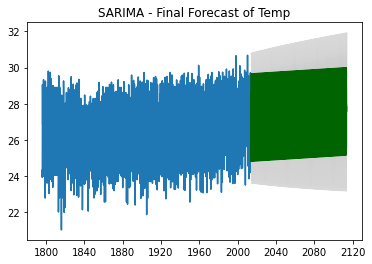

In [34]:
# Forecast
n_periods = 1200
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(temp_df2.index[-1], periods = n_periods, freq='1M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(temp_df2)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Temp")
plt.show()

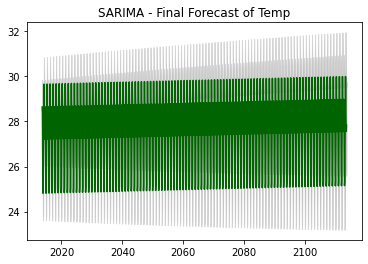

In [58]:
# Forecast
n_periods = 1200
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(temp_df2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# plt.plot(temp_df2)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Temp")
plt.show()

In [59]:
zoomed_index = pd.date_range('2021-01-01', periods = 24, freq='MS')
zoomed_index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

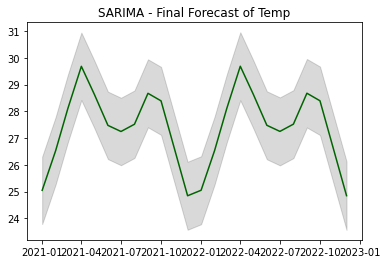

In [62]:
# Forecast
n_periods = 1200
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(temp_df2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(fitted_series[zoomed_index], color='darkgreen')
plt.fill_between(zoomed_index, 
                 lower_series[zoomed_index], 
                 upper_series[zoomed_index], 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Temp")
plt.show()

In [74]:
zoomed_index = pd.date_range(temp_df2.index[-1], periods = 12, freq='MS')
zoomed_index

DatetimeIndex(['2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01'],
              dtype='datetime64[ns]', freq='MS')

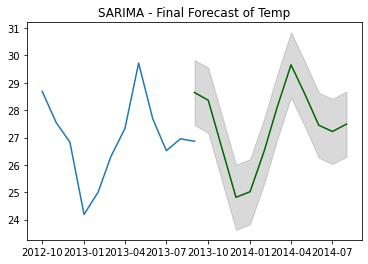

In [76]:
# Forecast
n_periods = 1200
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(temp_df2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(temp_df2[-12:])
plt.plot(fitted_series[zoomed_index], color='darkgreen')
plt.fill_between(zoomed_index, 
                 lower_series[zoomed_index], 
                 upper_series[zoomed_index], 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Temp")
plt.show()